In [260]:
import csv

pokemons = []

with open("./pokemon.csv", 'r') as file:
  csvreader = csv.reader(file)
  for row in csvreader:
    pokemons.append(row)
  
pokemons

[['Nom', 'Points de vie', 'Attaque', 'Type'],
 ['Ecayon', '49', '49', 'Eau'],
 ['Tiplouf', '53', '51', 'Eau'],
 ['Carabaffe', '59', '63', 'Eau'],
 ['Prinplouf', '64', '66', 'Eau'],
 ['Gobou', '50', '70', 'Eau'],
 ['Gamblast', '71', '73', 'Eau'],
 ['Mateloutre', '75', '75', 'Eau'],
 ['Tarpaud', '90', '75', 'Eau'],
 ['Crocrodil', '65', '80', 'Eau'],
 ['Phione', '80', '80', 'Eau'],
 ['Rosabyss', '55', '84', 'Eau'],
 ['Bargantua', '70', '92', 'Eau'],
 ['Poissoroy', '80', '92', 'Eau'],
 ['Clamiral', '95', '100', 'Eau'],
 ['Octillery', '75', '105', 'Eau'],
 ['Aligatueur', '85', '105', 'Eau'],
 ['Nucleos', '45', '30', 'Psy'],
 ['Deoxys', '50', '70', 'Psy'],
 ['Deoxys', '50', '95', 'Psy'],
 ['Deoxys', '50', '150', 'Psy'],
 ['Deoxys', '50', '180', 'Psy'],
 ['Spoink', '60', '25', 'Psy'],
 ['Mesmerella', '60', '45', 'Psy'],
 ['Siderella', '70', '55', 'Psy'],
 ['Eoko', '75', '50', 'Psy'],
 ['Crefadet', '75', '125', 'Psy'],
 ['Munna', '76', '25', 'Psy'],
 ['Groret', '80', '45', 'Psy'],
 ['Okeoke', 

In [261]:
type_psy = []
type_eau = []

for pokemon in pokemons:
    if 'Eau' in pokemon:
        type_eau.append(pokemon)
    elif 'Psy' in pokemon:
        type_psy.append(pokemon)

type_eau
type_psy

[['Nucleos', '45', '30', 'Psy'],
 ['Deoxys', '50', '70', 'Psy'],
 ['Deoxys', '50', '95', 'Psy'],
 ['Deoxys', '50', '150', 'Psy'],
 ['Deoxys', '50', '180', 'Psy'],
 ['Spoink', '60', '25', 'Psy'],
 ['Mesmerella', '60', '45', 'Psy'],
 ['Siderella', '70', '55', 'Psy'],
 ['Eoko', '75', '50', 'Psy'],
 ['Crefadet', '75', '125', 'Psy'],
 ['Munna', '76', '25', 'Psy'],
 ['Groret', '80', '45', 'Psy'],
 ['Okeoke', '95', '23', 'Psy'],
 ['Mew', '100', '100', 'Psy'],
 ['Mewtwo', '106', '110', 'Psy'],
 ['Mewtwo', '106', '150', 'Psy'],
 ['Mewtwo', '106', '190', 'Psy'],
 ['Symbios', '110', '65', 'Psy']]

In [262]:
pv_type_spy = []
degat_type_spy = []

pv_type_eau = []
degat_type_eau = []

for pokemon in type_psy:
    pv_type_spy.append(int(pokemon[1]))
    degat_type_spy.append(int(pokemon[2]))

for pokemon in type_eau:
    pv_type_eau.append(int(pokemon[1]))
    degat_type_eau.append(int(pokemon[2]))

pv_type_spy
degat_type_spy

pv_type_eau
degat_type_eau

[49, 51, 63, 66, 70, 73, 75, 75, 80, 80, 84, 92, 92, 100, 105, 105]

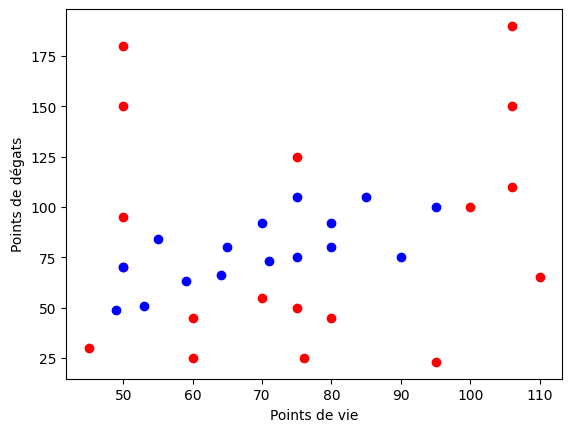

In [263]:
import matplotlib.pyplot as plt

plt.plot(pv_type_spy, degat_type_spy, 'ro')
plt.plot(pv_type_eau, degat_type_eau, 'bo')
plt.xlabel('Points de vie')
plt.ylabel('Points de dégats')
plt.show()

In [264]:
from math import *

def calculer_distance(x1, y1, x2, y2):
    distance = int(sqrt((x1-x2)**2 + (y1-y2)**2))
    return distance


In [265]:

def plus_proche(nv_pokemon: list, type_psy: list, type_eau: list, k: int):
    pokemons = type_psy + type_eau
    distances = []

    for pokemon in pokemons:
        pokemon[1] = int(pokemon[1])
        pokemon[2] = int(pokemon[2])
        distances.append(calculer_distance(nv_pokemon[1], nv_pokemon[2], pokemon[1], pokemon[2]))

    pokemon_distance = [i for _,i in sorted(zip(distances,pokemons))]
    pokemon_k = []

    eau = 0
    psy = 0
    for index in range(0, k):
        pokemon_k.append(pokemon_distance[index])
        if pokemon_k[index][3].lower() == 'eau':
            eau += 1
        elif pokemon_k[index][3].lower() == 'psy':
            psy += 1
    
    if eau < psy:
        print("Pokemon de type Psy")
    else:
        print("Pokemon de type Eau")
    
    return [nv_pokemon[1], nv_pokemon[2]]


Pokemon de type Eau


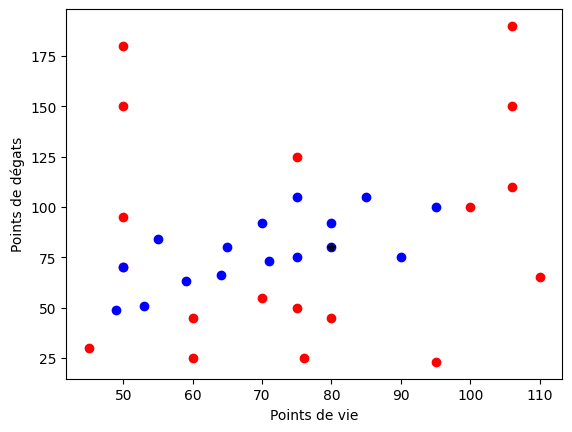

In [266]:
mon_pokemon = ["", 80, 80, None]

resultat = plus_proche(mon_pokemon, type_psy, type_eau, 3)

plt.plot(pv_type_spy, degat_type_spy, 'ro')
plt.plot(pv_type_eau, degat_type_eau, 'bo')
plt.plot(resultat[0], resultat[1], 'k*')
plt.xlabel('Points de vie')
plt.ylabel('Points de dégats')
plt.show()